# Expectation Maximization Clustering

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture



## Importing the dataset

In [20]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3,4]].values


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
dataset[100:]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
100,101,Female,23,62,41
101,102,Female,49,62,48
102,103,Male,67,62,59
103,104,Male,26,62,55
104,105,Male,49,62,56
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
dataset.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [25]:
df = pd.DataFrame(dataset)


In [26]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)

In [28]:
X_train

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Run EM

## Calculation of the Akaike Information Criterion (AIC) for Gaussian Mixture Models with different numbers of clusters applied to the Mall Customers dataset.

>AIC measures how well the model fits the data while penalizing for complexity (more parameters). Lower AIC values indicate better models. Both AIC and BIC (Bayesian Information Criterion) are commonly used to select the optimal number of clusters in Expectation-Maximization clustering.

*Code adapted from:* [Scikit-learn GaussianMixture documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)



In [29]:
aic_scores = []
best_gmm_aic = None
lowest_aic = np.inf

for n in range(1, 7):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_train)
    aic = gmm.aic(X_train)
    aic_scores.append(aic)
    if aic < lowest_aic:
        lowest_aic = aic
        best_gmm_aic = gmm

print("AIC scores:", aic_scores)
print("Best number of clusters according to AIC:", best_gmm_aic.n_components)


AIC scores: [np.float64(1145.1312123220987), np.float64(1117.623164001806), np.float64(1095.6468791100385), np.float64(1027.9288493699291), np.float64(963.0010487892964), np.float64(959.2416988029232)]
Best number of clusters according to AIC: 6


In [30]:
n_clusters = 6
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X_train)

GaussianMixture(n_components=6, random_state=42)

In [31]:
labels = gmm.predict(X_train)
df["cluster"] = labels
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


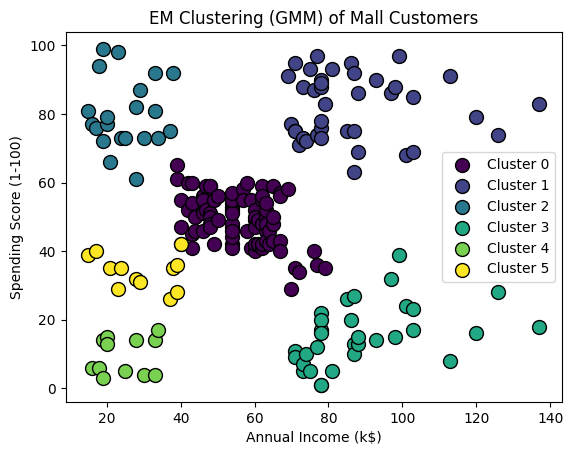

In [32]:
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for lbl, col in zip(unique_labels, colors):
    mask = df["cluster"] == lbl
    plt.scatter(
        df.loc[mask, "Annual Income (k$)"].astype(float),
        df.loc[mask, "Spending Score (1-100)"].astype(float),
        c=[col],
        label=f"Cluster {lbl}",
        edgecolor='k',
        s=100
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("EM Clustering (GMM) of Mall Customers")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5158502868918735
